# Introduction
____

One of the strengths of R as a language is how easy it makes it to create beautiful, informative visualizations. One of the most popular tools to create data visualizations in R is the ggplot2 library, which is part of the Tidyverse.  

> The [Tidyverse](https://www.tidyverse.org/), a collection of R packages built around the foundational idea about data in a table should have one variable per column, one observation per row and only one value per cell. 

Ggplot2 is very powerful, but it can take a little getting used to. This tutorial will get you up and running with ggplot2. We're going to use real data to make publication-ready charts using three of the most commonly-used plotting techniques.

_____________________
### What will I learn?

By time you finish this tutorial, you will:

* Understand the underlying philosophy behind ggplot
* Make a scatter plot and..
    * Add a fitted line
    * Add text labels to data points
    * Add a title and label your plot axes
* Make a bar plot and...
    * Choose whether your bar plot is stacked or grouped
    * Split a plot across multiple subplots
    * Create a custom color palette for your plot
* Make a line plot and...
    * Apply themes to your plot

### What do I need to know before I get started?

You may find some of the discussion here hard to understand if you don't have a basic familiar with the R language before you begin. I would recommend [this series of lessons](https://www.kaggle.com/rtatman/getting-started-in-r-first-steps/) if you've never used R or never programmed before.

### What will I need to do?

As you work through this tutorial, you'll have a number of exercise to complete. You are of course free to fork this notebook and do them here, but the easiest option is to fork a version of [this workbook for this lesson](https://www.kaggle.com/rtatman/visualizing-data-with-ggplot2-workbook/).

 __________
 
 # Table of Contents

*  [The big idea behind ggplot2](#The-big idea-behind-ggplot2)
*  [Scatter plots](#Making-scatter-plots): Includes **adding a fitted line**, **labelling data points** and adding **plot titles & axis labels**.
*  [Bar charts](#Making-bar-charts): Includes **stacked and grouped bar charts**, **splitting plots across multiple smaller plots** and **creating a customized color palette**
* [Line charts](#Line-charts): Includes **applying themes to your plot**
    
    ________________

# The big idea behind ggplot2

______

Ggplot2 works a bit different from other R packages, and that's by design. 

>The "gg" in "ggplot" stands for "the grammar of graphics". If you're curious, you can learn more about what this means in [this paper](http://vita.had.co.nz/papers/layered-grammar.html).

Plots in ggplot2 are "built up" using multiple functions connected with the plus sign (+). The first function, ggplot(), just draws the outline of the plot, including the the axes and tick marks. It takes two arguments:

1. The dataset that you want to plot. 
2. A function, aes(), short for aesthetic. This function can take multiple arguments, and each argument tells ggplot which variables in the dataset you want to be mapped to which part of the plot. By default, the first two arguments will be assigned to the x-axis and y-axis.

The ggplot() function itself doesn't actually plot anything, it just creates the outline of the plot. To actually plot something in that outline, we need to add a geom layer to our plot. There are lots of different geom layers (you can see a full list of them [here](http://ggplot2.tidyverse.org/reference/#section-layer-geoms)) and you can add multiple layers to the same plot. The general syntax of ggplot looks like this:

    # ggplot syntax looks like this
    ggplot(dataset, aes(xaxis, yaxis)) +
        geom_something() +
        geom_somethingElse()

First you call ggplot() and pass it the dataset & aesthetics you want to plot. Then you add the layer(s) you want. 

Note that you do need to have a plus sign between every layer of the same plot. If you end a line without a plus sign, ggplot2 will think that you're done adding things and ignore everything that shows up after that (you'll also get an error because R doesn't expect lines to begin with +).

    # This will just plot the empty ggplot, without the geom_something
    ggplot(dataset, aes(xaxis, yaxis))
        + geom_something()

In this tutorial, we're going to practice making plots using the three [most popular layers](https://eric.netlify.com/2017/08/10/most-popular-ggplot2-geoms/):

* geom_point() makes a scatter plot, where each data point is represented by a point on the plot
* geom_bar() makes a bar chart, where each bar shows the number of observations in a given category
* geom_line() makes a line plot, where points are connected by a straight line 

Ready? Let's get started!

# Setting up our workspace
_____

Before we more on, let's make sure we set up our workspace. We'll need to read in the libraries and data we're going to use. In your workbook, this step has already been done for you. 

In [1]:
# read in our libraries
library(tidyverse) # includes ggplot2
library(ggthemes) # includes pre-made themes we'll use near the end

# read in our data
candyRankings <- read_csv("../input/the-ultimate-halloween-candy-power-ranking/candy-data.csv")
candyProduction <- read_csv("../input/us-candy-production-by-month/candy_production.csv")

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1.9000     ✔ purrr   0.2.4     
✔ tibble  1.3.4          ✔ dplyr   0.7.4     
✔ tidyr   0.7.2          ✔ stringr 1.2.0     
✔ readr   1.1.1.9000     ✔ forcats 0.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Parsed with column specification:
cols(
  competitorname = col_character(),
  chocolate = col_double(),
  fruity = col_double(),
  caramel = col_double(),
  peanutyalmondy = col_double(),
  nougat = col_double(),
  crispedricewafer = col_double(),
  hard = col_double(),
  bar = col_double(),
  pluribus = col_double(),
  sugarpercent = col_double(),
  pricepercent = col_double(),
  winpercent = col_double()
)
Parsed with column specification:
cols(
  observation_date = col_date(format = ""),
  IPG3113N = col_double()
)


# Making scatter plots
_____

Now that we have our data loaded into R, we can get started plotting. 

The candyRankings dataset has information on different candies, including how expensive they are and how much sugar they have in them. One question we can ask using this dataset is whether there is a  a relationship between a candy's price and the amount of sugar in it. To see if this is the case, we can use a scatter plot.

> **Scatter plot:** A plot with two axes, each representing a different variable. Each individual observation is showing using a single point. The position of the point is determined by the value of the variables assigned to the x and y axes for that observation. 

To make a scatterplot, we need to make a blank chart with a mapping for both the x and y aesthetic and then add a geom_point() layer. 

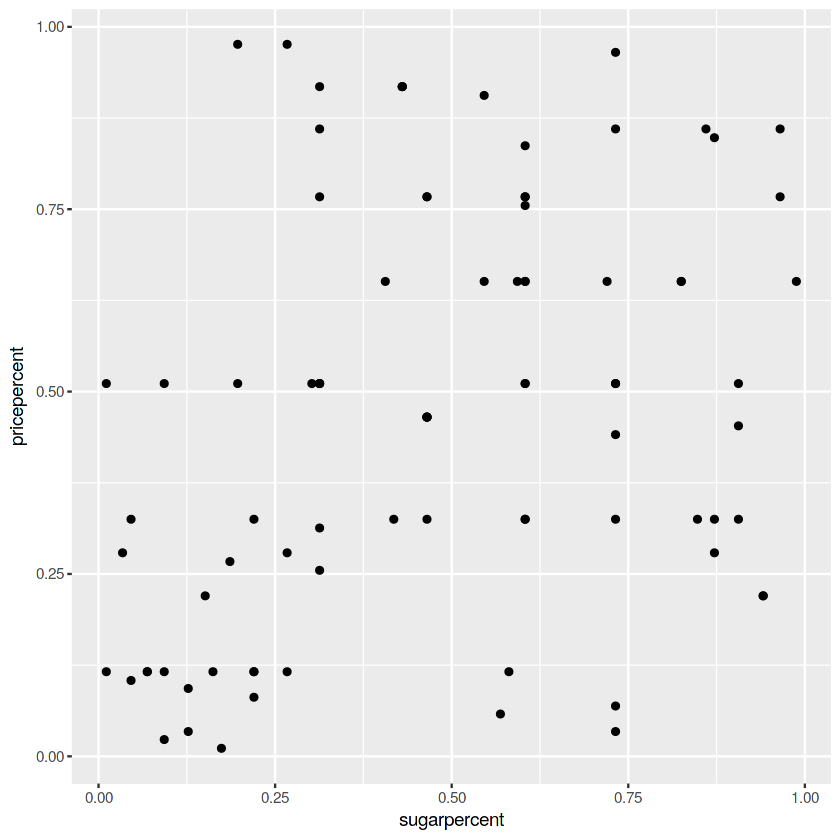

In [2]:
# first we need to set up our plot
ggplot(data = candyRankings, aes(x = sugarpercent, y = pricepercent)) +
    geom_point() # then add a layer of points

We can keep adding additional layers to this plot to make it more informative. One thing that is often useful when you're looking at data on a scatter plot is a visual representation of how closely the variable on the x axis and the variable on the y axis are related to each other, and the strength of that relationship. We can summarize this using a fitted line.

> **Fitted line:** A line representing some function of x and y that has the best fit (or the smallest overall error) for the observed data.

In ggplot, we can automatically add a fitted line using the layer geom_smooth(). By default, geom_smooth() will show the relationship between the x and y variables using locally weighted scatter plot smoothing (also known as LOESS) rather than by drawing a straight line. If we want a single straight line to summarize our data, we need to specify that we want geom_smooth() to fit a a linear model (or "lm").

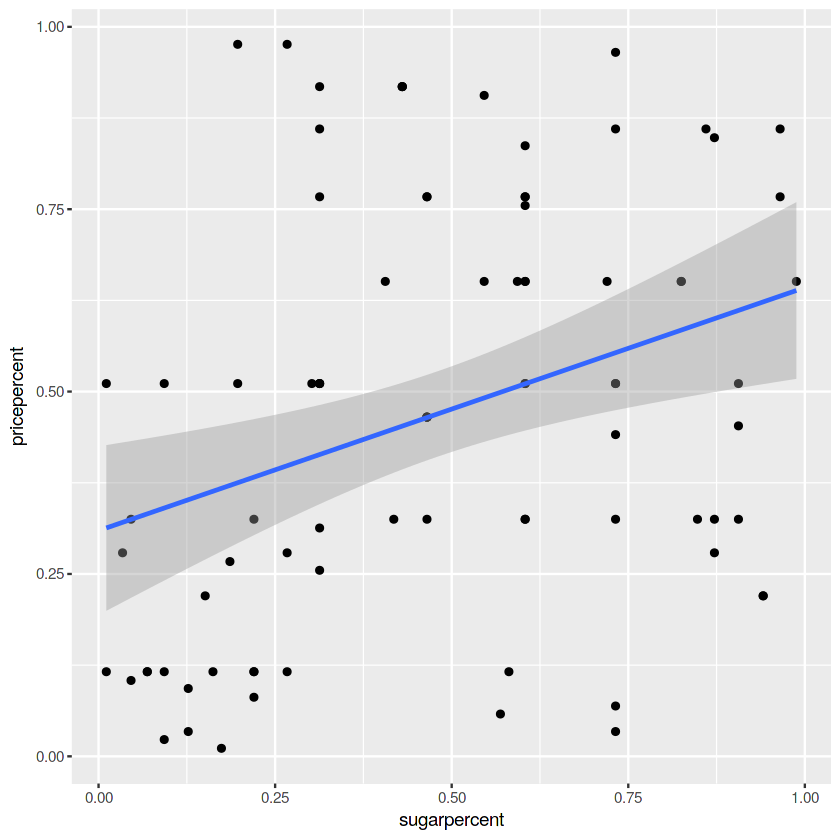

In [3]:
# first we need to set up our plot
ggplot(data = candyRankings, aes(x = sugarpercent, y = pricepercent)) +
    geom_point() + # then add a layer of points
    geom_smooth(method = "lm") # and then add a fitted line

The blue line on the plot represents the linear function we've fitted and shows that there is a relationship between how much sugar is in a candy and how expensive it is: in general, candy with more sugar is more expensive. 

> **What's that gray shape behind the line?** This is the confidence interval for this function. It outlines the area that should contain the line which represents the true function 95% of the time. 

If you're like me, you're probably curious to see which candies fall where on this plot. To show this, we can add yet another layer, this time with the text of the name of different candies. We can use the function geom_text() to do this. However, with our current set-up geom_text() doesn't know what text to plot or where. To plot the names of the candies from the data frame, we're going to need to add another aesthetic mapping when we set up the plot. We need to make sure that ggplot knows that we want to use the information from the competitorname column as the label.

> **What are all the arguments aes() can take?** As of [November 2017](https://github.com/tidyverse/ggplot2/blob/master/R/aes.r) here's a list of all the possible aesthetic mappings: "adj", "alpha", "angle", "bg", "cex", "col", "color",  "colour", "fg", "fill", "group", "hjust", "label", "linetype", "lower",  "lty", "lwd", "max", "middle", "min", "pch", "radius", "sample", "shape", "size", "srt", "upper", "vjust", "weight", "width", "x", "xend", "xmax",
"xmin", "xintercept", "y", "yend", "ymax", "ymin", "yintercept", "z". Note that some of these (like, "col", "color" and "colour") will be mapped to the same aesthetic.
 
 Different geom layers need different aesthetics. If you add an aesthetic that isn't used by any of the layers you're plotting ggplot2 will ignore it, but if you don't add an aesthetic that one of your layers needs no plot will be generated.

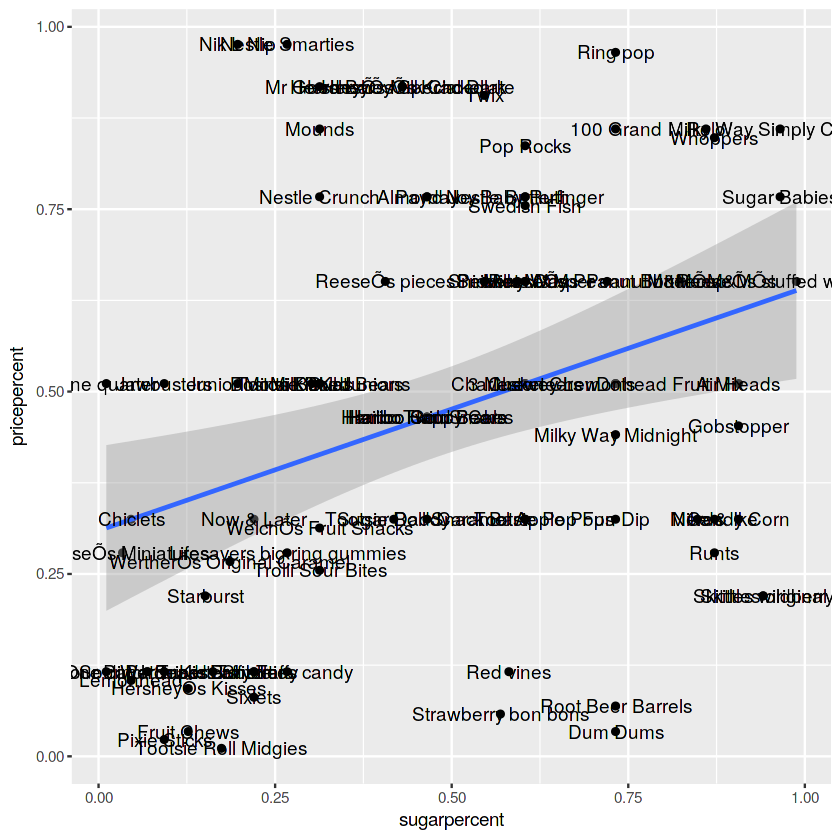

In [4]:
# first we need to set up our plot
ggplot(data = candyRankings, aes(x = sugarpercent, 
                                 y = pricepercent, 
                                 label = competitorname)) + #make sure to add the label aes!
    geom_point() + # then add a layer of points
    geom_smooth(method = "lm") + # and then add a fitted line
    geom_text() # and then add labels to the points

Oh dear, that's pretty hard to read. We can change the labels to make them easier to read by using some additional arguments from the geom_text function. (You can find a list of all the options and some helpful example charts in the [geom_text() documentation](http://ggplot2.tidyverse.org/reference/geom_text.html).) With a little fiddling, we can make our text labels much easier to read:

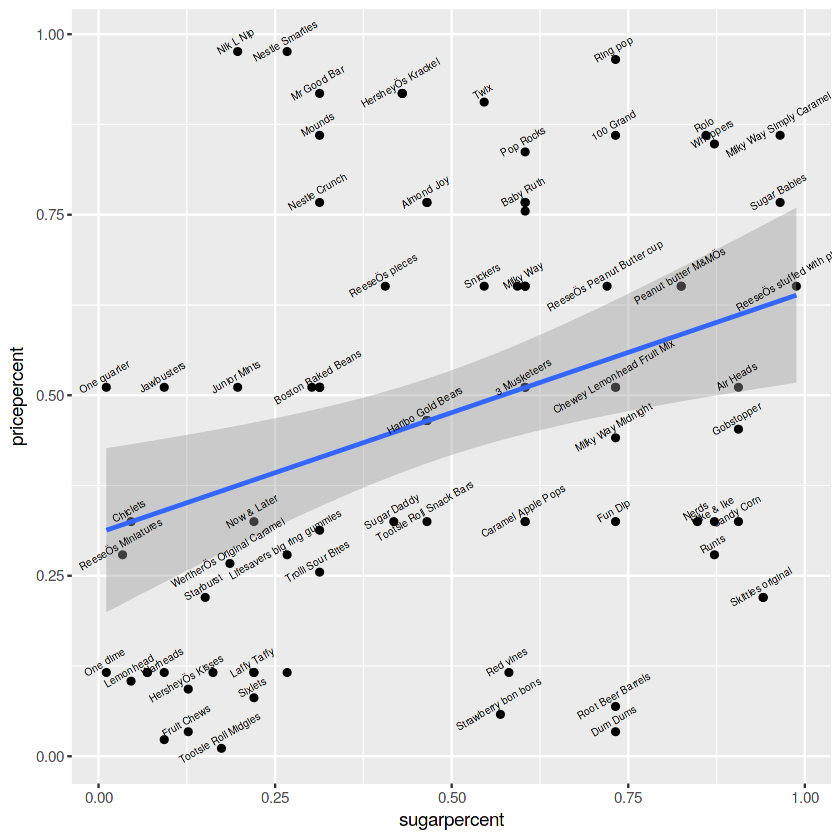

In [5]:
# first we need to set up our plot
ggplot(data = candyRankings, aes(x = sugarpercent, 
                                 y = pricepercent, 
                                 label = competitorname)) +
    geom_point() + # then add a layer of points
    geom_smooth(method = "lm") + # and then add a fitted line
    geom_text(check_overlap = T,# automatically reduce overlap (deletes some labels)
              vjust = "bottom", # adjust the vertical orientation
              nudge_y = 0.01, # move the text up a bit so it doesn't touch the points
              angle = 30,# tilt the text 30 degrees
              size = 2 # make the text smaller (to reduce overlap more)
             ) # and then add labels to the points

Much better! It's not quite ready to go yet, though: "sugarpercent" and "pricepercent" aren't the most informative axes labels and I'd also like to add a title to the plot.

> ** Plot titling tips:** a good plot title will summarize the main information in the plot.

We can add a title and axes lalbels using the [labs() function](http://ggplot2.tidyverse.org/reference/labs.html), which is another layer that we can add to our plot.

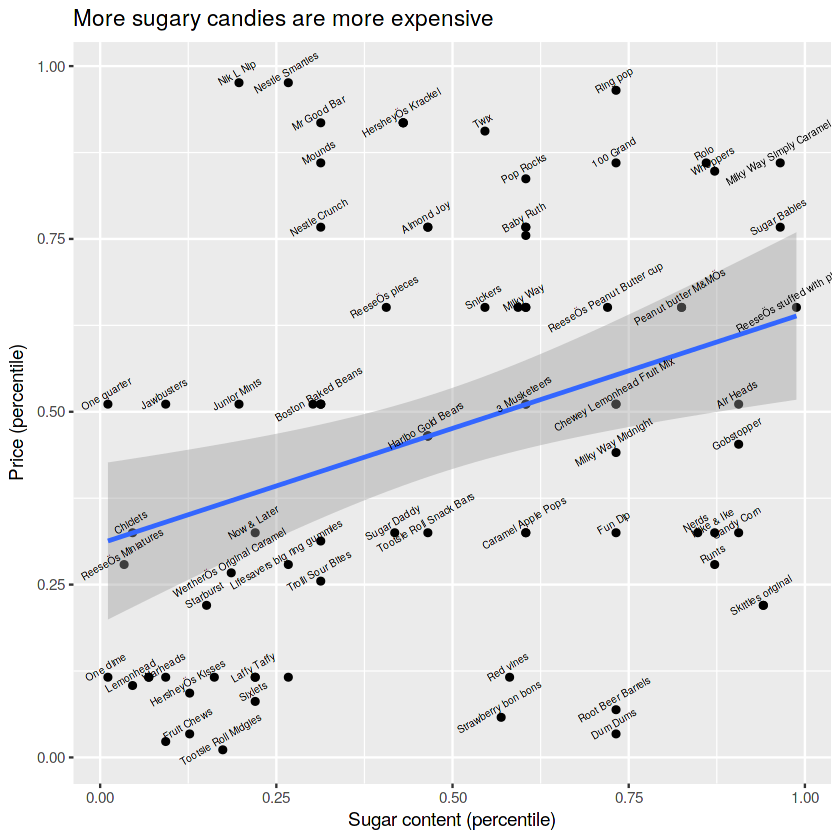

In [6]:
# first we need to set up our plot
ggplot(data = candyRankings, aes(x = sugarpercent, 
                                 y = pricepercent, 
                                 label = competitorname
                                )) +
    geom_point() + # then add a layer of points
    geom_smooth(method = "lm") + # and then add a fitted line
    geom_text(check_overlap = T,# automatically reduce overlap (deletes some labels)
              vjust = "bottom", # adjust the vertical orientation
              nudge_y = 0.01, # move the text up a bit so it doesn't touch the points
              angle = 30,# tilt the text 30 degrees
              size = 2 # make the text smaller (to reduce overlap more)
             ) + # and then add labels to the points
    labs(title = "More sugary candies are more expensive", # plot title
         x = "Sugar content (percentile)", # x axis label
         y = "Price (percentile)" # y axis label
        )

We can also, if we like, remove the points themselves and just use the labels themselves as the points. If we do this, we should probably also remove the arguments from geom_text() that move the labels so they don't overlap with the points.

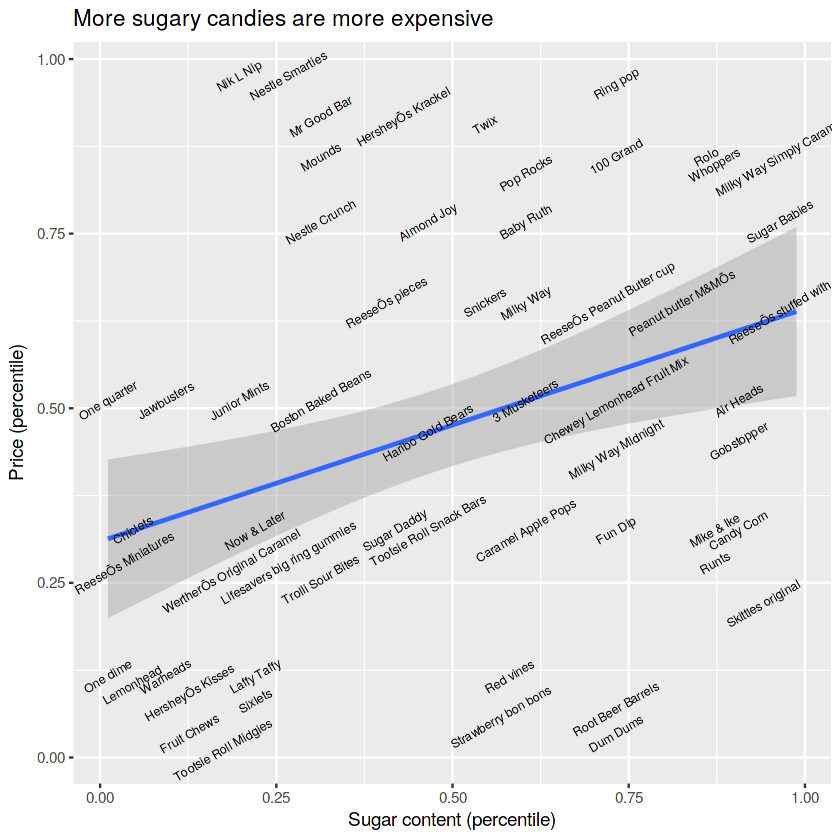

In [7]:
# first we need to set up our plot
ggplot(data = candyRankings, aes(x = sugarpercent, 
                                 y = pricepercent, 
                                 label = competitorname
                                )) +
    geom_smooth(method = "lm") + # and then add a fitted line
    geom_text(check_overlap = T,# automatically reduce overlap (deletes some labels)
              angle = 30,# tilt the text 30 degrees
              size = 2.5 # make the text smaller (to reduce overlap more)
             ) + # and then add labels to the points
    labs(title = "More sugary candies are more expensive", # plot title
         x = "Sugar content (percentile)", # x axis label
         y = "Price (percentile)" # y axis label
        )

And there we are, an informative visualization of this dataset that tells a clear story. You may have noticed that the way I got to this plot was by starting with a very basic plot and then adding more and more information until I got something I was happy with. The way that ggplot2 works strongly encourages this type of work flow and it's the one I personally use in my own work. There's nothing wrong with rendering the same plot twenty times with a tiny tweak each time until you get exactly what you're looking for!

So far we've learned:

* how to make a scatter plot using geom_point()
* how to add a fitted line to the data using geom_smooth()
* how to add text labels using geom_text()
* how to add a title and change the x & y axis labels using labs()

Now it's your turn to try your hand at applying these functions yourself. Head on over to [the workbook for this tutorial](https://www.kaggle.com/rtatman/visualizing-data-with-ggplot2-workbook/) and try it out yourself!



# Making bar charts
____

Scatter plots are great if you're looking at numeric variables (where the thing you're looking at can be measured with a number). But what if you're looking at something like whether one of your observations belongs to a certain group or not?

In this dataset, we have a lot of information about qualities each candy has. Does it contain chocolate? Is it fruit flavored? Is there caramel in the candy? These are what are called categorical variables, because a given candy candy belongs to one specific category. For example, Reese's Peanut Butter Cups do contain chocolate, are not fruit flavored and do not have caramel in them. (Although, not gonna lie, caramel peanut butter cups sound like they'd be amazing.)

One of the most common ways of visualizing categorical data is to use a bar chart. 

> **Bar chart**: a data visualization with categories along the x axis and the count of observations from each category on the y axis.

In ggpolt2, we can make a bar chart using the layer geom_bar(). You'll  notice that when I set up my initial plot, I only give aes() one argument, for the x axis. That's because the counts for the y axis are calculated automatically from my data frame, so I don't need to tell ggplot anything about them.

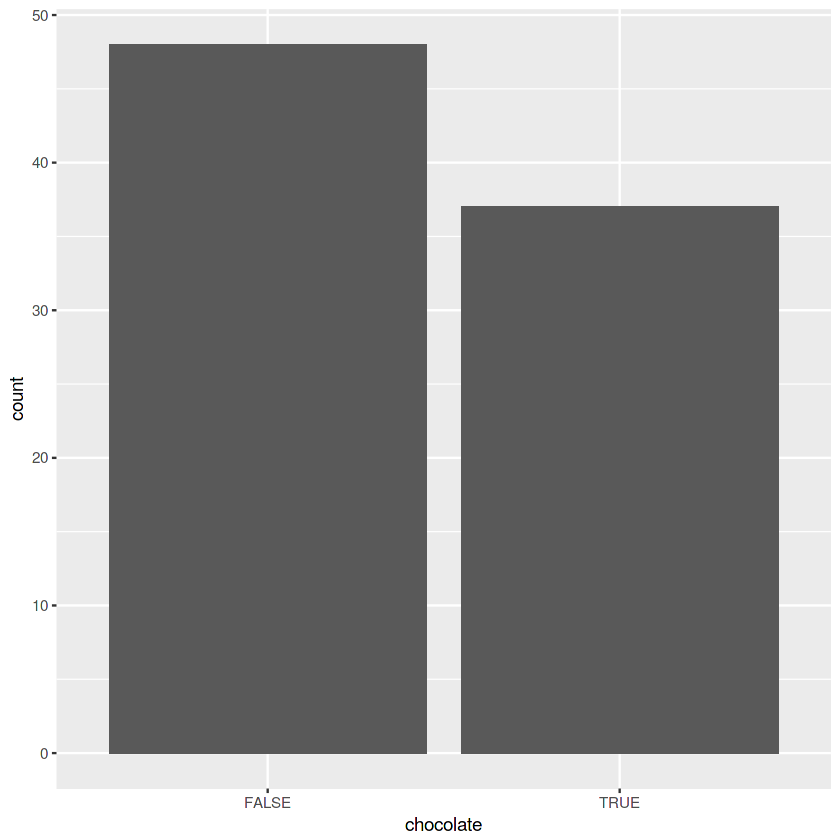

In [8]:
# select out the columns that have the features of the candy (chocolate, caramel, etc.)
candyFeatures <- candyRankings %>% select(2:10)
# make sure that these are booleans (logical)
candyFeatures[] <- lapply(candyFeatures, as.logical)

# make a bar plot
ggplot(candyFeatures, aes(x = chocolate)) + # set up the plot
    geom_bar() # add the barpot

On it's own, this isn't a very interesting chart. Sure, it tells us how many of the candies have chocolate in them, but there's not much utility beyond that. We can make this chart more useful by adding more information to it. Let's see if there's a relationship between the number of candies which have chocolate in them and the number of candies which have caramel. 

To do this, we're going to add an additional aesthetic to our plot. We're going to ask ggplot2 to color-code the bars by setting "fill" to caramel.

> **Why not set "color" to caramel?**: The color aesthetic changes the color of lines & the outline of shapes. If we
mapped caramel to color, we'd get a bar chart where the color of the outline of the bar showed us information about caramel instead of the color of the bar telling us about caramel.




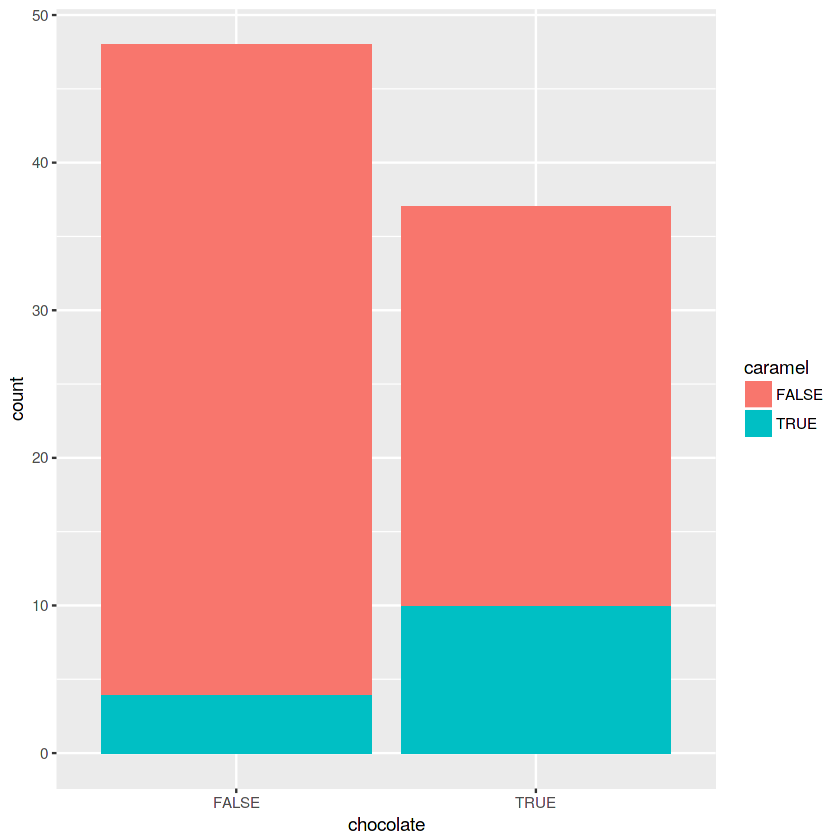

In [9]:
# make a bar plot
ggplot(candyFeatures, aes(x = chocolate,
                          fill = caramel # map the fill color to caramel           
                         )) + # set up the plot
    geom_bar() # add the barpot

We can tell by looking at this chart that most caramel candies also have chocolate in them. It might be slightly easier to see this if the bars in this chart were beside each other rather than stacked on top of each other. We can have our bars next to each other by adding a position argument to geom_bar() and setting it to "dodge". (You can see more options for geom_bar() by [checking out the documentation](http://ggplot2.tidyverse.org/reference/geom_bar.html).) 
   

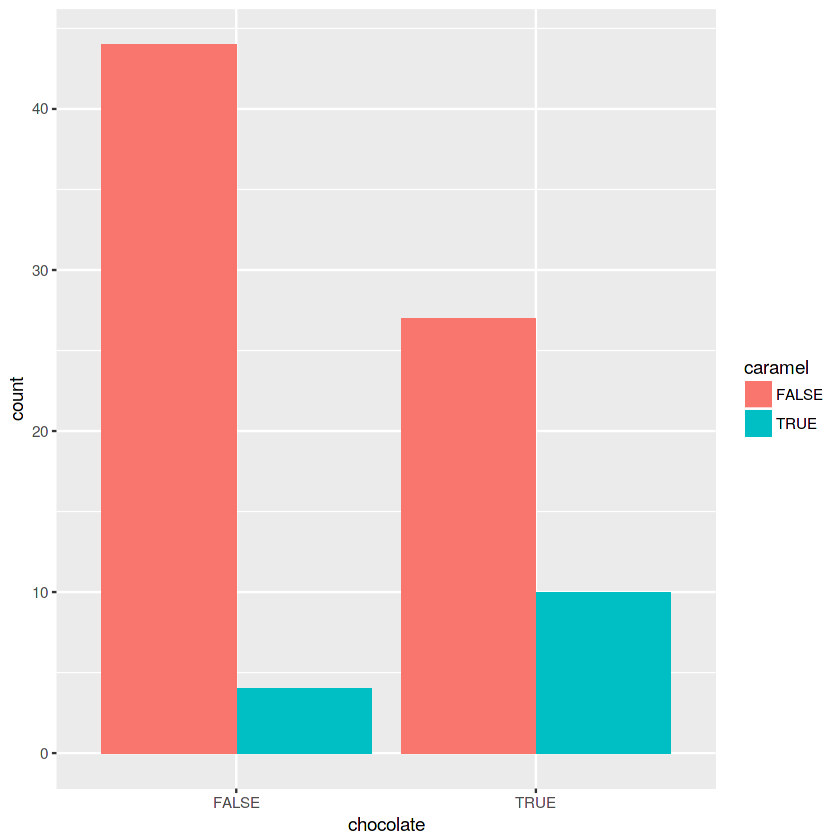

In [10]:
# make a bar plot
ggplot(candyFeatures, aes(x = chocolate,
                          fill = caramel # map the fill color to caramel           
                         )) + # set up the plot
    geom_bar(position = "dodge") # add the barpot

Not bad! It might be even easier to see the big story here (that there is an interaction between chocolate and caramel) if we pulled apart these two columns and put them into two separate charts. We can do this using the function facet_wrap(), which is another layer that we can add to our plot.  

> **facets**: A way of breaking apart a plot of a specific data frame so that each level of a the target factor is shown in a separate, smaller chart. 

facet_wrap() doesn't know which factor to use to break apart the chart, though, so we need to pass it a vector of the names of the variables it should use to split the chart into smaller charts.

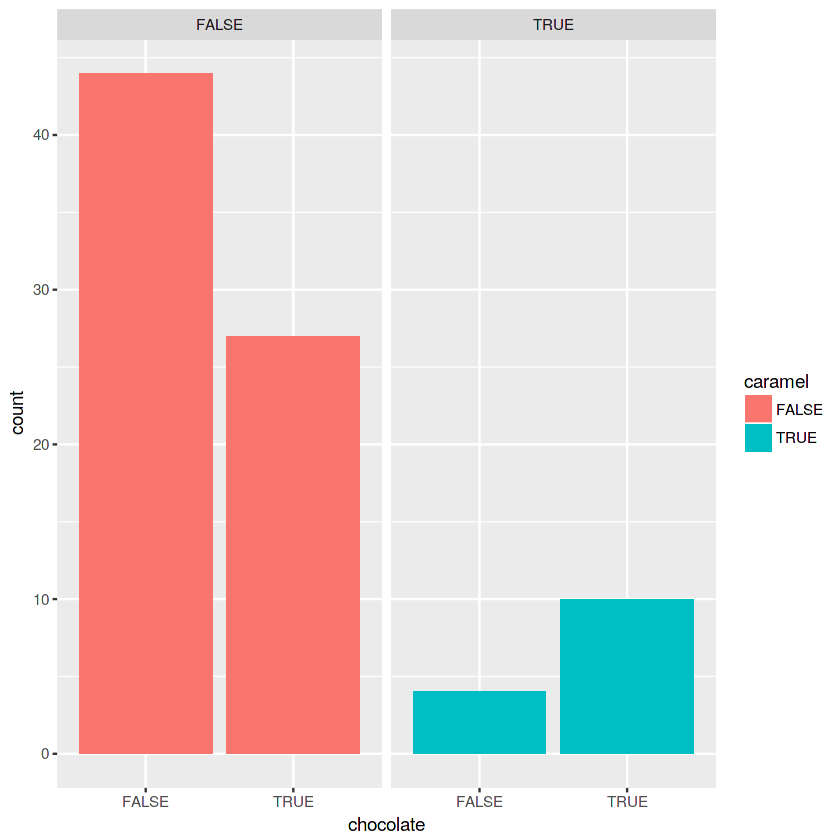

In [11]:
# make a bar plot
ggplot(candyFeatures, aes(x = chocolate,
                          fill = caramel # map the fill color to caramel           
                         )) + # set up the plot
    geom_bar(position = "dodge") + # add the barpot
    facet_wrap(c("caramel")) # put each level of "caramel" in a different facet

That seems much easier to read! One thing that I would like to change, however, is the colors. Let's change the color theme of our plot. You can change the color of the fill using the layer scale_fill_manual(). You'll need to pass it a vector of colors 
by their hex code. (I like [this PDF guide to colors in R](http://www.stat.columbia.edu/~tzheng/files/Rcolor.pdf).) 

The colors will be matched to the levels of the factor that you've mapped to the fill aesthetic in alphabetic order. In this case, because "FALSE" comes before "TRUE" alphabetically, I should put the color that I want to show up when caramel is "FALSE" first.


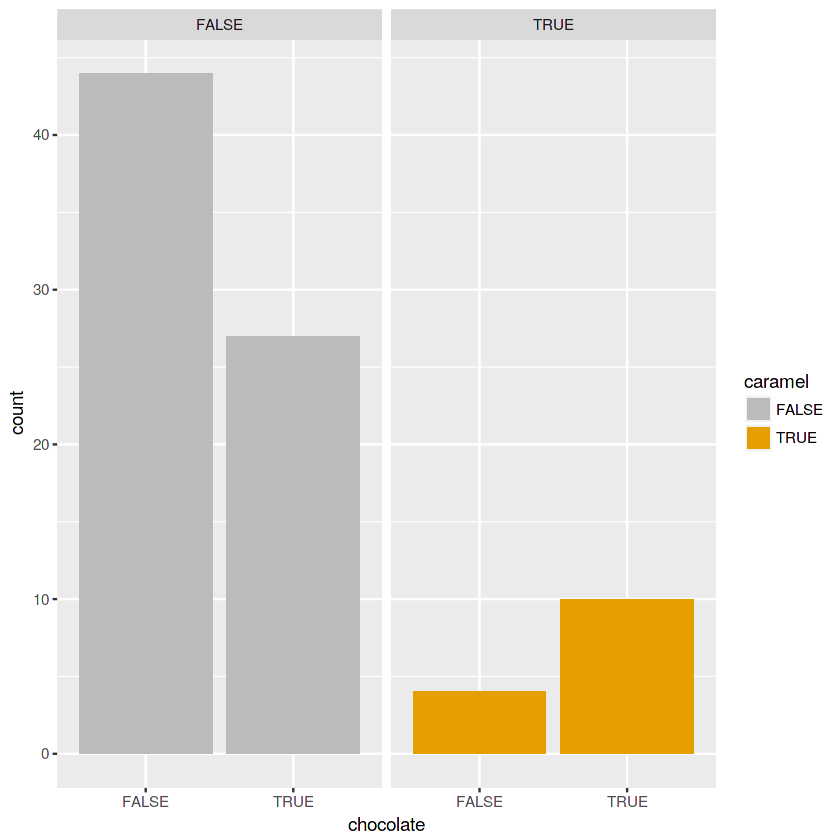

In [12]:
# make a bar plot
ggplot(candyFeatures, aes(x = chocolate,
                          fill = caramel # map the fill color to caramel
                         )) + # set up the plot
    geom_bar(position = "dodge", size = 2) + # add the barpot
    facet_wrap(c("caramel")) + # put each level of "caramel" in a different facet
    scale_fill_manual(values=c("#BBBBBB", # a nice, neuteral grey 
                               "#E69F00")) # a gold caramel color

Great! This almost looks ready to share. Let's just add a couple more finishing touches, like an informative title and axis labels. I'm also going to move the legend inside of the plot area and remove the legends at the top of the facets using theme(). (I personally like to move legends inside the area of plots if there's a large empty space in our plot, like there is at the top of the facet where the data for the candies with caramel is plotted.)

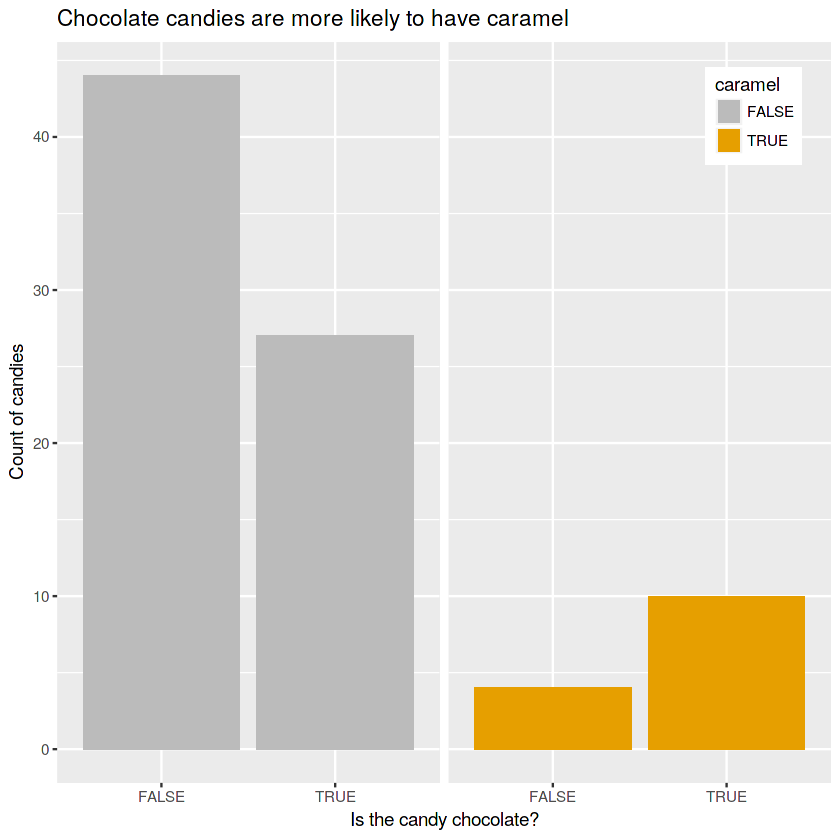

In [13]:
# make a bar plot
ggplot(candyFeatures, aes(x = chocolate,
                          fill = caramel # map the fill color to caramel
                         )) + # set up the plot
    geom_bar(position = "dodge", size = 2) + # add the barpot
    facet_wrap(c("caramel")) + # put each level of "caramel" in a different facet
    scale_fill_manual(values=c("#BBBBBB", # a nice, neuteral grey 
                               "#E69F00")) + # a gold caramel color
    labs(title = "Chocolate candies are more likely to have caramel", # title
        x = "Is the candy chocolate?", # x axis
        y = "Count of candies") + # y axis
    theme(legend.position = c(0.9, 0.9), # move legend inside plot
          strip.background = element_blank(), # remove strip from top of facets
          strip.text.x = element_blank())  # remove text from top of facets

As you can see, the general idea of behind ggplot (starting with just a blank plot and slowly adding more and more layers) also lends itself to a general workflow where we start with a very simple plot and add layers until it looks exactly the way we want. 

In this section, we've learned how to:

* make a bar plot using geom_barplot()
* map a variable to the fill aesthetic
* choose between stacked bar plots and bar plots where the bars are next ot each other
* facet our plots so that each layer of a variable is shown in a seperate, smaller plot
* create a custom color palette for our visualziations

Now it's time for you to apply the things you've just learned!  Head on over to [the workbook for this lesson](https://www.kaggle.com/rtatman/visualizing-data-with-ggplot2-workbook/) and try your hand at making your own bar plot. 

# Line charts
___

Line charts are most commonly used when you want to show how a measurement has changed over time. The time points are usually shown on the x axis while the value for the measurement is shown on the y axis. Each two adjacent points are connected with a line, hence the name. In ggplot2, you can make a line chart by adding the geom_line() layer. 

Since line charts are generally used with time series data, I'm going to use a different dataset. The candyProduction dataset has information on candy production in the US, measured monthly since 1972. Let's plot it using geom_line(). I'm also going to add a trend line fit with the default LOESS method. 

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


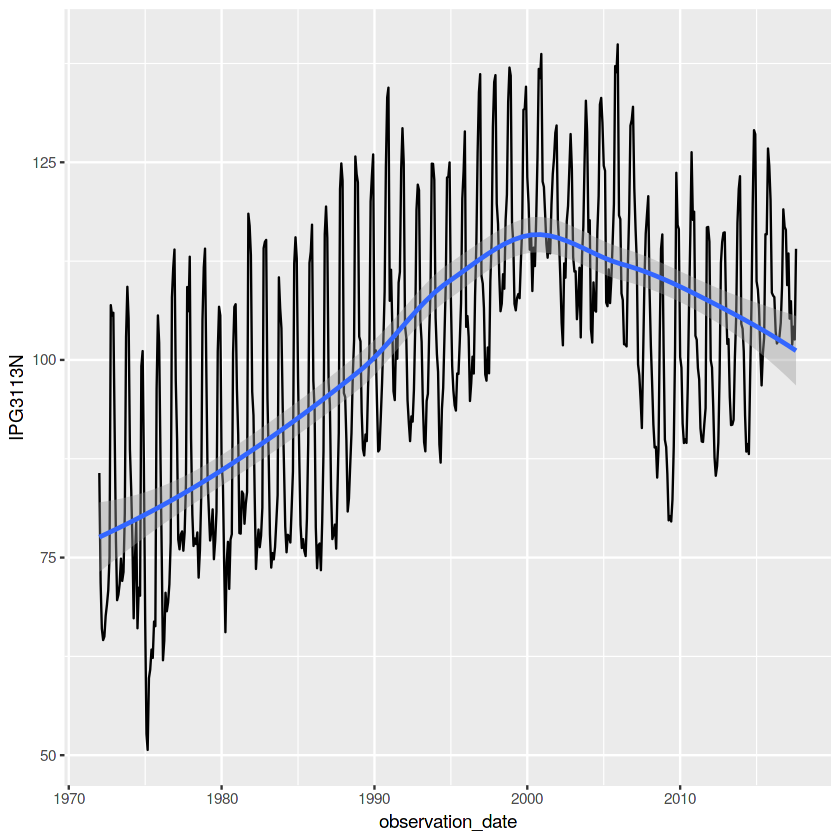

In [14]:
# plot of US candy production per month, with trend line
ggplot(data = candyProduction, aes(x = observation_date, y = IPG3113N)) +
    geom_line() + # add a line chart
    geom_smooth() # add a smoothing function

You might noticed that we don't have to tell ggplot2 that the observation_date column has dates in is; one of the really nice thing about the Tidyverse is that it will do its best to automatically parse dates. 

Now we've got a nice chart, but it's a little bit boring looking: it just uses the default ggplot2 theme. What if we want to add a little pizazz?

One way we can do this quickly is by adding custom themes. The ggthemes package that we loaded in above has a lot of custom themes that we can add as custom layer. First, let's save our plot to a variable. 

In [15]:
# save our line plot to a variable
linePlot <- ggplot(data = candyProduction, aes(x = observation_date, y = IPG3113N)) +
    geom_line() + 
    geom_smooth() +
    labs(title = "Monthly candy production (US)",
        x = "", # making the axis label blank will remove it
        y = "As percent of 2012 production")

Now let's play around with using different themes. You can find examples of [all of the themes in ggthemes package here](https://yutannihilation.github.io/allYourFigureAreBelongToUs/ggthemes/) and a [list of all the themes bulit into ggplot here](http://ggplot2.tidyverse.org/reference/ggtheme.html). It's also possible for you to make your own themes, but since that's [fairly involved](http://joeystanley.com/blog/custom-themes-in-ggplot2) we're not going to cover that here. 

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


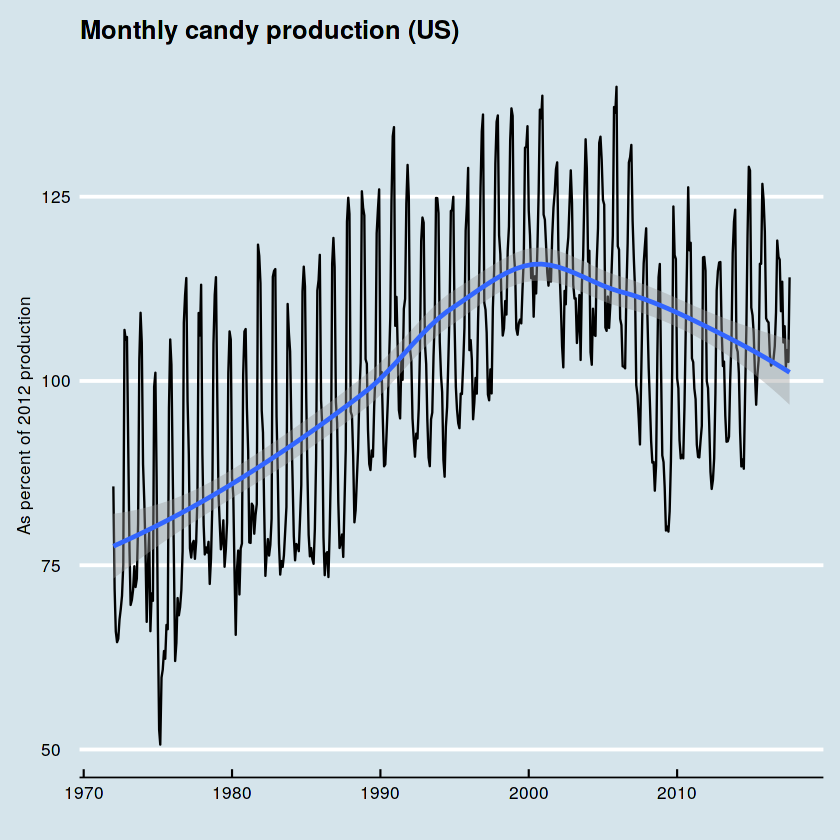

In [16]:
# plot with the Economist theme
linePlot + theme_economist()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


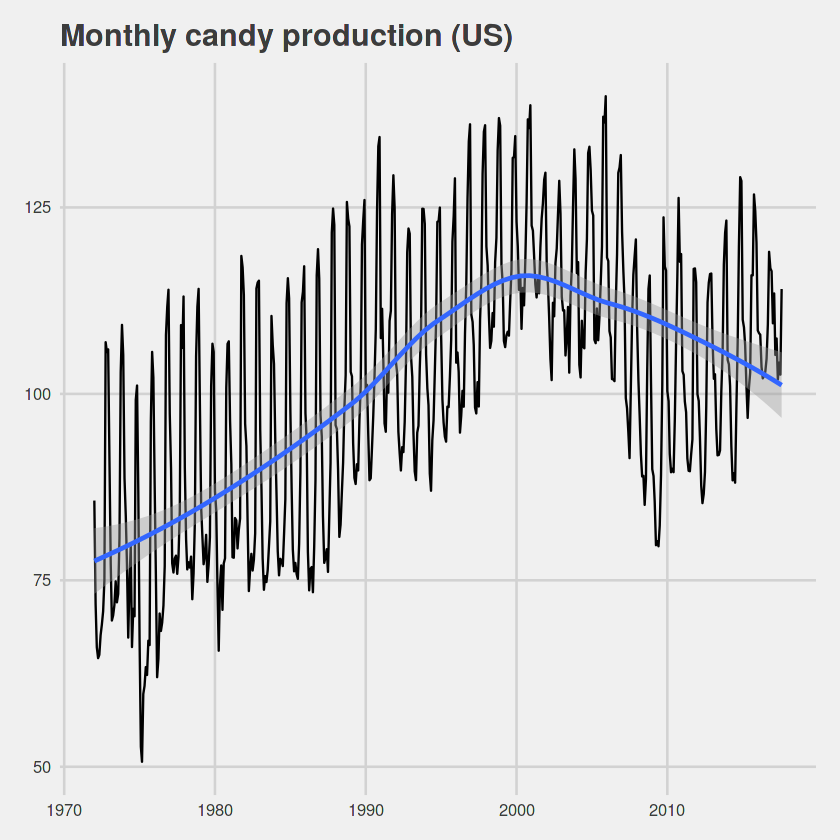

In [17]:
# plot with the 538 theme
linePlot + theme_fivethirtyeight()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


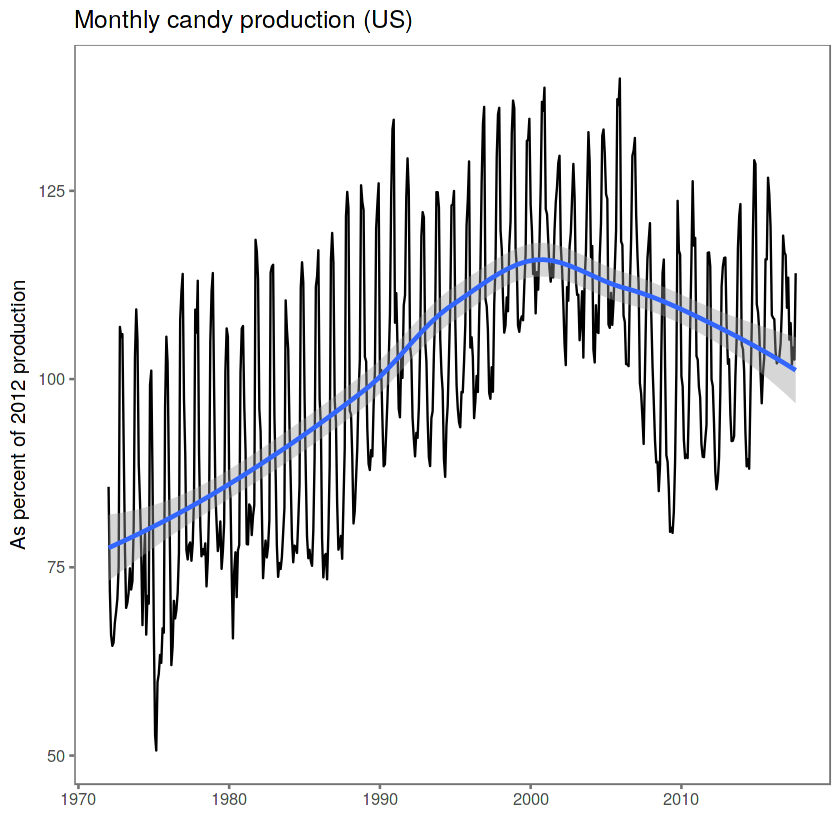

In [18]:
# plot with the theme based on Few (2001)
linePlot + theme_few()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


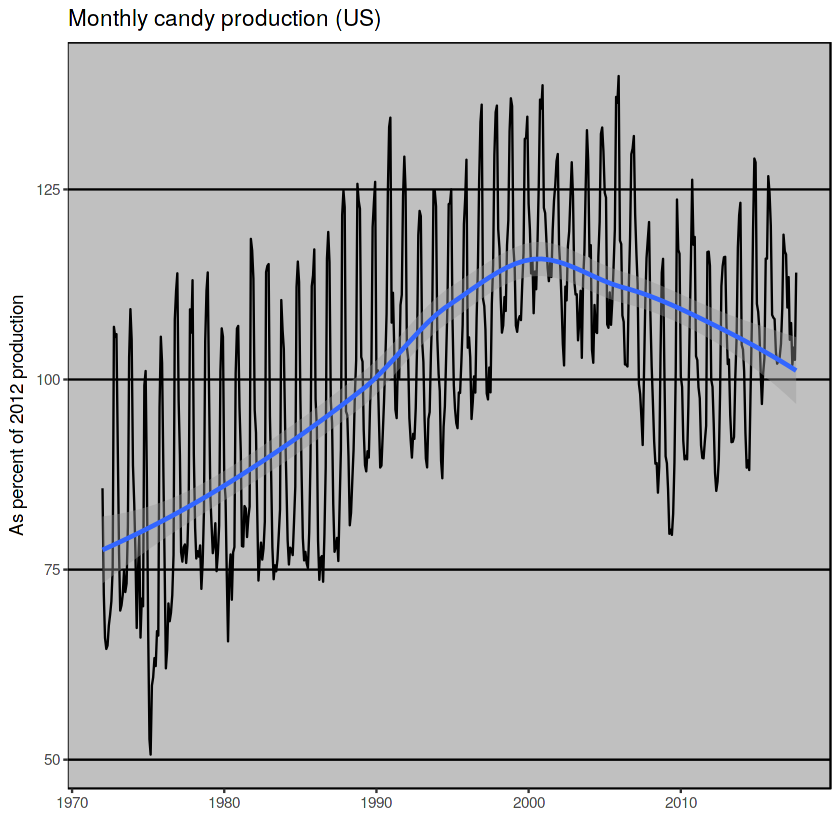

In [19]:
# plot with the theme based on older Excel plots
linePlot + theme_excel()

And that's pretty much it! In this section you've learned how to:
    
* make line charts using geom_line()
* apply different themes from the ggthemes package

Now it's time for you to try your hand at making line charts. Head on over to [the notebook for this lesson](https://www.kaggle.com/rtatman/visualizing-data-with-ggplot2-workbook/) and try your hand at making your own line charts.

# Conclusion
___

And that wraps it up for this beginner ggplot2 tutorial. At this point, particularly if you've been completing the exercises in the workbook, you should:

* Understand the underlying philosophy behind ggplot
* Be able to make a scatter plot and..
    * Add a fitted line
    * Add text labels to data points
    * Title and label your plot axes
* Be able to make a bar plot and...
    * Choose whether your bar plot is stacked or grouped
    * Split a plot across multiple subplots
    * Create a custom color palette for your plot
* Be able to make a line plot and...
    * Apply themes to your plot
    
You've also seen a few examples of the process for creating new charts: start simply, with a single geom, and then slowly add more and more layers until it looks exactly how you want it.

Congrats on getting started with ggplot! Now that you've got some practice, why not head over to [the datasets page](https://www.kaggle.com/datasets) and apply your new skills to a different dataset?